In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

## Double pendulums
There are two pendulums. The second pendulum is hanged on the first pendulum. The potential for the first pendulum is $U_1=-m_1 gL_1\cos\theta_1$. The potential for the second pendulum is $U_2=-m_2 g(L_1\cos\theta_1+L_2\cos\theta_2)$. 

The total potential for the system is 
\\[
U=-(m_1+m_2) gL_1\cos\theta_1-m_2 gL_2\cos\theta_2
\\] 

The kinetic energy for the first pendulum is $T_1=\frac{1}{2}m_1 L_1^2\dot\theta_1^2$. The kinetic energy for the second pendulum is $T_2=\frac{1}{2}m_2L_1^2\dot\theta_1^2+m_2L_1L_2\dot\theta_1\dot\theta_2\cos(\theta_1-\theta_2)+\frac{1}{2}m_2L_2^2\dot\theta_2^2$. 


The total kinetic energy is 
\\[
T=\frac{1}{2}(m_1+m_2)L_1^2\dot\theta_1^2+m_2L_1L_2\dot\theta_1\dot\theta_2+\frac{1}{2}m_2L_2^2\dot\theta_2^2
\\]

The Lagrangian is
\\[
\mathcal{L}=T-U=\frac{1}{2}(m_1+m_2)L_1^2\dot\theta_1^2+m_2L_1L_2\dot\theta_1\dot\theta_2+\frac{1}{2}m_2L_2^2\dot\theta_2^2\\\quad\quad\quad\quad+(m_1+m_2) gL_1\cos\theta_1+m_2 gL_2\cos\theta_2
\\]
The Euler-Langrange equation is 
\begin{align}
\frac{\partial \mathcal{L}}{\partial \theta_1}&=\frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot\theta_1}\\\rightarrow 0=
(m_1+m_2)L_1^2\ddot\theta_1+m_2L_1L_2\cos(\theta_1-\theta_2)\ddot\theta_2&+(m_1+m_2)gL_1\sin\theta_1+m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta_2^2\\
\frac{\partial \mathcal{L}}{\partial \theta_2}&=\frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot\theta_2}\\\rightarrow 0=m_2L_1L_2\cos(\theta_1-\theta_2)\ddot\theta_1+m_2L_2^2\ddot\theta_2&+m_2gL_2\sin\theta_2-m_2L_1L_2\sin(\theta_1-\theta_2)\dot\theta_1^2
\end{align}

In order to solve the equation using solve_ivp, extra steps need to be done. The final result is below

\begin{align}
\ddot\theta_1=\frac{m_2 g\sin\theta_2\cos(\theta_1-\theta_2)- m_2\sin(\theta_1-\theta_2)(L_1\dot\theta_1^2\cos(\theta_1-\theta_2)+L_2\dot\theta_2^2)-(m_1+m_2)g\sin\theta_1}{L_1(m_1+m_2\sin(\theta_1-\theta_2)^2}
\end{align}

\begin{align}
\ddot\theta_2 = \frac{(m_1+m_2)(L_1\dot\theta_1^2\sin(\theta_1-\theta_2)-g\sin\theta_2+g\sin\theta_1\cos(\theta_1-\theta_2))+m_2L_2\dot\theta_2^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2))}{L_2(m_1+m_2\sin(\theta_1-\theta_2)^2}
\end{align}

In [3]:
class Double_Pendulum():
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta_1/dt d^2theta_1/dt^2 dtheta_2/dt d^2theta_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = theta1(t) and y[1] = dtheta1/dt
                                      y[2] = theta2(t) and y[3] = dtheta2/dt
            
        Returns
        -------
        """
        theta1, theta1_dot, theta2, theta2_dot = y
        theta1_dot = theta1_dot
        theta1_ddot = (self.m2*self.g*np.sin(theta2)*np.cos(theta1-theta2)\
                    - self.m2*np.sin(theta1-theta2)*(self.L1*theta1_dot**2*np.cos(theta1-theta2)+self.L2*theta2_dot**2)\
                    - (self.m1+self.m2)*self.g*np.sin(theta1))\
                    /(self.L1*(self.m1+self.m2*np.sin(theta1-theta2)**2))
        
        theta2_dot = theta2_dot
        theta2_ddot = ((self.m1+self.m2)*(self.L1*theta1_dot**2*np.sin(theta1-theta2)\
                    -self.g*np.sin(theta2)+self.g*np.sin(theta1)*np.cos(theta1-theta2))
                    +self.m2*self.L2*theta2_dot**2*np.sin(theta1-theta2)*np.cos(theta1-theta2))\
                    /(self.L2*(self.m1+self.m2*np.sin(theta1-theta2)**2))
        
        return [theta1_dot, theta1_ddot, theta2_dot, theta2_ddot]
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a pendulum 
p1 = Double_Pendulum(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

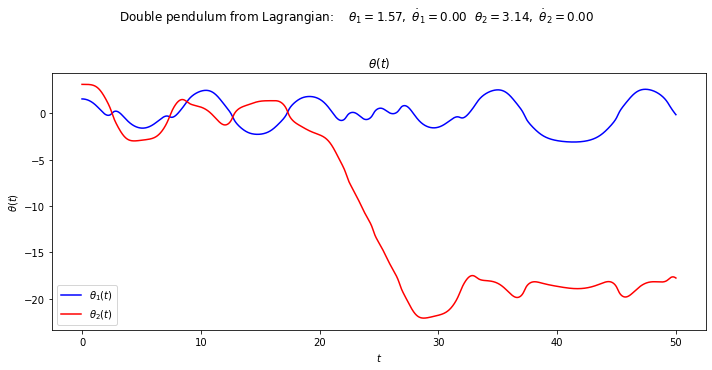

In [7]:
# initial conditions
theta1_0 = 1/2*np.pi
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\theta_1 = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1 = {theta1_dot_0:.2f}$' + \
                rf'  $\theta_2 = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2 = {theta2_dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')
    
# theta plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=(r'$t$', r'$\theta(t)$'), 
            color='blue',
            label=r'$\theta_1(t)$', 
            title=r'$\theta(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta_2(t)$', 
            ax=ax_a)

fig.tight_layout()
fig.savefig('double_pendulum.png', bbox_inches='tight')

To show that the system is chaotic, compare the solution of $\theta_1$ and $\theta_2$ using two slightly different initial condition

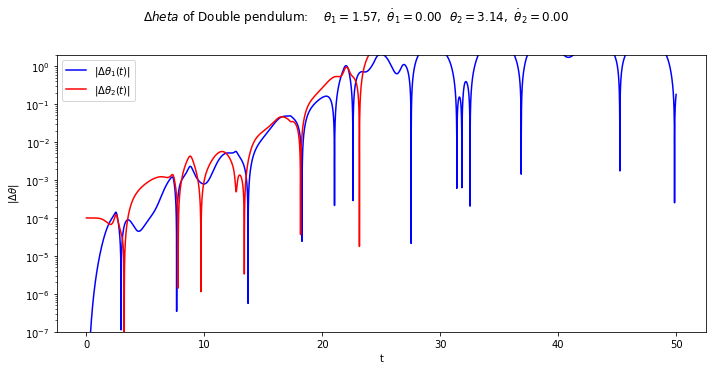

In [9]:
# one plot with multiple initial conditions
theta1_0_1 = 1/2*np.pi
theta1_dot_0_1 = 0.
theta2_0_1 = np.pi
theta2_dot_0_1 = 0.
theta1_1, theta1_dot_1, theta2_1, theta2_dot_1 = p1.solve_ode(t_pts, theta1_0_1, \
                                                      theta1_dot_0_1, theta2_0_1, \
                                                      theta2_dot_0_1)

theta1_0_2 = 1/2*np.pi
theta1_dot_0_2 = 0.
theta2_0_2 = np.pi+0.0001
theta2_dot_0_2 = 0.
theta1_2, theta1_dot_2, theta2_2, theta2_dot_2 = p1.solve_ode(t_pts, theta1_0_2, \
                                                      theta1_dot_0_2, theta2_0_2, \
                                                      theta2_dot_0_2)

# Calculate the absolute value of \theta_2 - \theta_1
Delta_theta1 = np.fabs(theta1_2-theta1_1)
Delta_theta2 = np.fabs(theta2_2-theta2_1)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = f'$\Delta\theta$ of Double pendulum:  ' + \
                rf'  $\theta_1 = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1 = {theta1_dot_0:.2f}$' + \
                rf'  $\theta_2 = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2 = {theta2_dot_0:.2f}$'
fig.suptitle(overall_title, va='baseline')
    
# plot from t=0 to t=50
ax_a = fig.add_subplot(1,1,1)              

start, stop = start_stop_indices(t_pts, 0., 50.)
plot_y_vs_x(t_pts[start : stop], Delta_theta1[start : stop], 
            color='blue', label=r'$|\Delta\theta_1(t)|$', semilogy=True)

plot_y_vs_x(t_pts[start : stop], Delta_theta2[start : stop], 
            color='red', label=r'$|\Delta\theta_2(t)|$', semilogy=True) 
ax_a.set_ylim(1.e-7,2.)
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\theta|$')
                              
fig.tight_layout()

# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('delta_theta.png', bbox_inches='tight')

As shown in the plot above, $\Delta\theta$ increases over time. The system is chaostic.